### Ejercicio SVM
### Juan Pablo Fonseca 138263

In [1]:
# importo librerías
sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
df = pd.read_csv('andSVM_2.csv') # leo la bd
%matplotlib inline

In [2]:
X = df[df.columns[0:-1]].astype(np.int32) # divido en X, y, donde y es el valor real de la categoría
y = df[df.columns[-1]].astype(np.int32)

#### Primera parte
#### C = 1

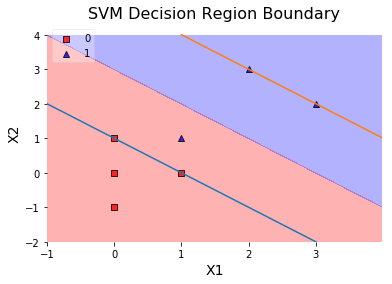

Se observa la frontera de decisión, así como los márgenes que pasan por los vectores de soporte.
Con C = 1 (poca penalización), vemos que se tolera el error de un dato.


In [3]:
clf = SVC(kernel = 'linear',C = 1)
clf.fit(X, y)
# Graficar regiones de decisión
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Info de la tabla para que se vea bien
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.plot([-1,0,1,2,3],[2,1,0,-1,-2])
plt.plot([1,2,3,4],[4,3,2,1])
plt.title('SVM Decision Region Boundary', size=16)
plt.show()
print "Se observa la frontera de decisión, así como los márgenes que pasan por los vectores de soporte."
print "Con C = 1 (poca penalización), vemos que se tolera el error de un dato."

#### C = 100

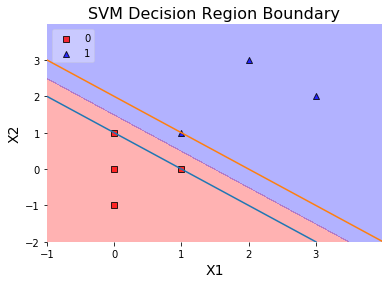

Se observa la frontera de decisión, así como los márgenes que pasan por los vectores de soporte.
Con C = 100, ya no se tolera el error de clasificación anterior.
Sin embargo, la distancia entre los márgenes disminuye con respecto a la gráfica anterior.


In [4]:
clf = SVC(kernel = 'linear',C = 100)
clf.fit(X, y)
# Graficar regiones de decisión
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Info de la tabla para que se vea bien
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.plot([-1,0,1,2,3],[2,1,0,-1,-2])
plt.plot([-1,0,1,2,3,4],[3,2,1,0,-1,-2])
plt.title('SVM Decision Region Boundary', size=16)
plt.show()
print "Se observa la frontera de decisión, así como los márgenes que pasan por los vectores de soporte."
print "Con C = 100, ya no se tolera el error de clasificación anterior."
print "Sin embargo, la distancia entre los márgenes disminuye con respecto a la gráfica anterior."

#### Segunda parte (puntos en un círculo)

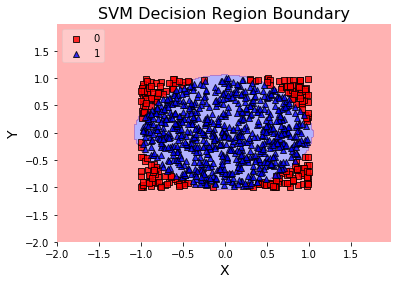

In [5]:
Circle_X = np.random.rand(1000,2)*2-1
Circle_Y=[1 if Circle_X[i][0]**2+Circle_X[i][1]**2<=1 else 0 for i in range(0,1000)]
Xdf = pd.DataFrame(data=Circle_X)
Ydf = pd.DataFrame(data=Circle_Y)
clf = SVC()
clf.fit(Xdf, Circle_Y)
# Graficar regiones de decisión
plot_decision_regions(X=Xdf.values, 
                      y=Ydf.values.ravel(),
                      clf=clf, 
                      legend=2)

# Info de la tabla para que se vea bien
plt.xlabel("X", size=14)
plt.ylabel("Y", size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

#### Observamos que el SVM divide relativamente bien los datos, evidentemente sin utilizar un kernel lineal, sino otro adecuado para ello.

In [13]:
print confusion_matrix(Circle_Y,clf.predict(Xdf).tolist())

[[208  30]
 [  0 762]]


#### La matriz de confusión nos indica que la mayoría de los puntos fueron clasificados correctamente. De hecho sólo 30 de los 1000 puntos fueron clasificados incorrectamente; es decir, un 3%. 